### Abstract

This dataset is inspired by the MNIST database for handwritten digits of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

The structure of the csv file is:

* The first row contains column headers ['names', 'labels','1','2',…..'784']
* The 'names' column contains font file names such as 'Acme-Regular' and 'ZillaSlab-Bold'
* The 'labels' column contains characters such as '@','E' or '+'
* The remaining 784 columns contain the grayscale pixel values for the image of the corresponding character in the 'name' font-style
* This dataset contains over 281,000 images and is part of the Warhol.ai Computational Creativity and Cognitive Type projects.

### Aim
The objective of this notebook is to classify the images from TMNIST dataset using a Convolutional Neural Network.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

In [ ]:
# Mounting Google Drive in Colab
drive.mount('/content/drive')

# Navigating to the directory where my CSV file is stored
os.chdir('/content/drive/MyDrive')

# Reading the CSV file into a Pandas dataframe
data = pd.read_csv('94_character_TMNIST.csv')

Mounted at /content/drive


In [ ]:
print(data.head())

                  names labels    1    2    3    4    5    6    7    8  ...  \
0         Salsa-Regular      6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  MouseMemoirs-Regular      D  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2     Creepster-Regular      f  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3     SeoulNamsan-Light      /  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  HachiMaruPop-Regular      F  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   775  776  777  778  779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 786 columns]


### Exploratory Data Analysis

In [ ]:
# Determining shape of the dataset
print('Shape of the dataset is (rows,columns): ', data.shape)

Shape of the dataset is (rows,columns):  (274093, 786)


In [ ]:
# Number of unique classes in the dataset
classes = data['labels'].unique()
print('Number of unique classes in the dataset:', len(classes))

Number of unique classes in the dataset: 94


In [ ]:
# Printing the unique classes
print(classes)

['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']


In [ ]:
# Getting the number of unique font types present in the dataset
fonts = data['names'].unique()
print('Number of unique type of fonts in the dataset:', len(fonts))

Number of unique type of fonts in the dataset: 2990


In [ ]:
# Printing the unique font types
print(fonts)

['Salsa-Regular' 'MouseMemoirs-Regular' 'Creepster-Regular' ...
 'NotoSansArabic[wdth,wght]' 'Taprom' 'NotoSansSymbols2-Regular']


In [ ]:
# Removing redundant columns
y = data[['labels']]
x = data.drop(columns=['names','labels'], axis=1)

# Checking the shape of training and testing dataset
x.shape, y.shape

((274093, 784), (274093, 1))

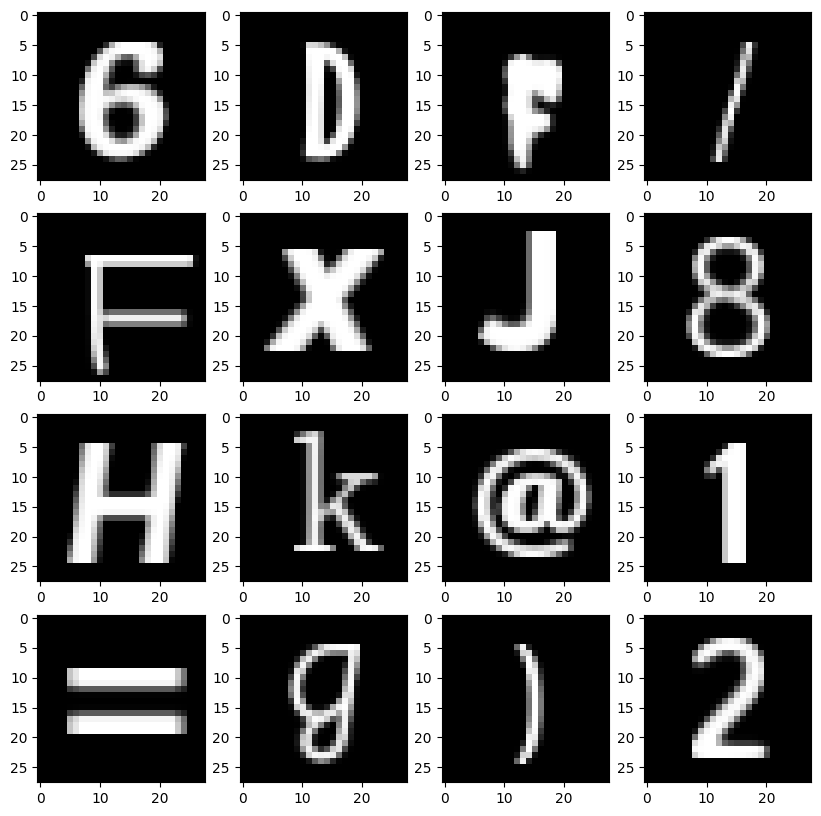

In [ ]:
# Plotting the dataset by reshaping it into a (28*28) size image
plt.figure(figsize=(10, 10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x.values[i].reshape(28,28), cmap = plt.get_cmap('Greys_r'))
plt.show()

### Train and Test split

In [ ]:
# Splitting the dataset into Training and Testing in 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
#Shape of training Data
X_train.shape, y_train.shape

((219274, 784), (219274, 1))

In [ ]:
#Shape of testing Data
X_test.shape, y_test.shape

((54819, 784), (54819, 1))

In [ ]:
# Mapping the characters to numbers so that the neural network can read the data
lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)

In [ ]:
# Normalizing the pixel values to [0,1] range
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_train = X_train.values.reshape(X_train.shape[0],28,28)
X_test = X_test.values.reshape(X_test.shape[0],28,28)


### Convolutional Neural Network

Convolutional Neural Network (CNN) is a type of deep learning neural network that is widely used for image classification, object detection, and other visual recognition tasks.

The basic idea behind CNNs is to apply convolutional filters to the input image and extract features at different spatial locations. The filters are learned during the training process and can be seen as patterns that the network looks for in the input image. The output of the convolutional layer is passed through non-linear activation functions, such as ReLU, to introduce non-linearity and enhance the discriminative power of the network.

CNNs are typically composed of several layers, including convolutional layers, pooling layers, and fully connected layers. Here is a brief explanation of each layer:

* **Convolutional layer:** This layer applies a set of learnable filters to the input image to extract local features. Each filter is a small matrix of weights that is convolved with the input image to produce a feature map. The number of filters in a convolutional layer determines the number of output feature maps.

* **Activation layer:** This layer applies a non-linear function to the output of the convolutional layer to introduce non-linearity into the model. The most commonly used activation function is the Rectified Linear Unit (ReLU), which sets negative values to zero and preserves positive values.

* **Pooling layer:** This layer reduces the spatial dimensions of the output feature maps by applying a downsampling operation, such as max-pooling or average-pooling. This helps to reduce the computational cost and control overfitting.

* **Fully connected layer:** This layer takes the output of the convolutional and pooling layers and passes it through a set of fully connected neurons. These neurons compute a weighted sum of the inputs and apply an activation function to produce the final output.

* **Output layer:** This layer produces the final output of the network, which is usually a probability distribution over the possible classes.

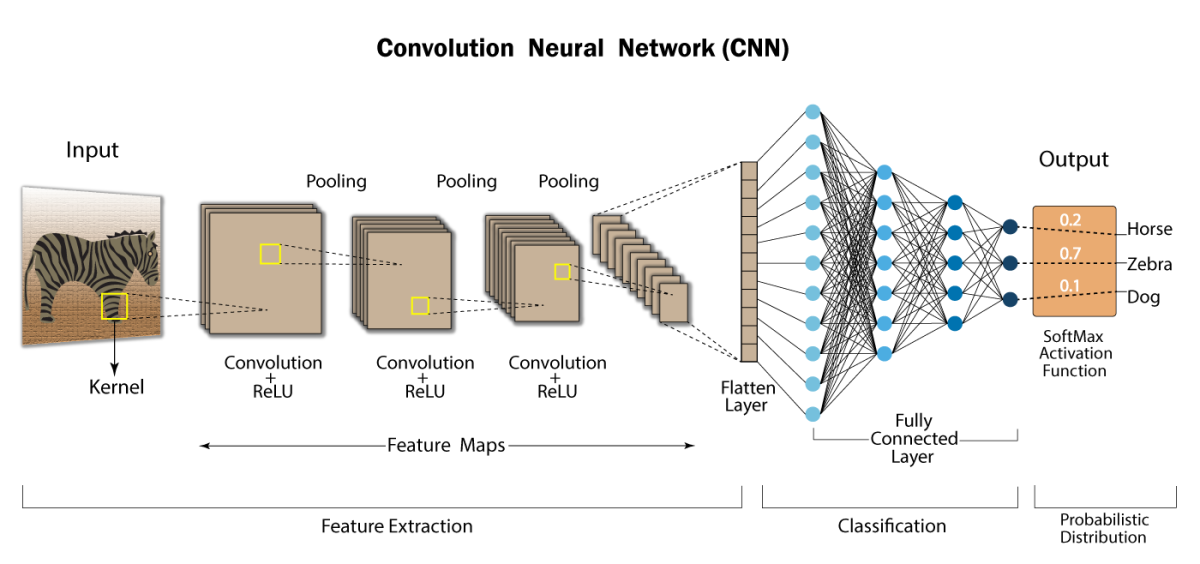

CNNs can be trained using backpropagation and gradient descent to minimize a loss function, such as categorical cross-entropy, between the predicted and true labels.


##### Building a Convolutional Neural Network

The CNN architecture includes several layers.

1. The first layer is a Convolutional layer that applies 32 distinct Kernels of size (4 * 4) to the input image, which is a 2D array of size (28 * 28) with a single channel. The ReLU activation function is used in this layer.
2. The second layer is a Max-Pooling layer with a neighborhood of (2 * 2).
3. The third layer is another Convolutional layer with 64 kernels of size (4 * 4) and ReLU activation.
4.The fourth layer is a Max-Pooling layer with the same neighborhood size as the second layer.
5. The fifth layer is a Flatten layer that transforms the 2D array into a 1D array using ReLU activation.
6. The sixth layer is a Dense layer with 128 neurons and ReLU as the activation function.
7. The seventh layer is the output layer with 94 neurons, where each neuron represents a class, and SoftMax activation function assigns probabilities to the classes.

The neural network is compiled using categorical cross-entropy as the loss function and the adam optimizer.

In [ ]:
# Defining the CNN model architecture
cnn_model = Sequential()

cnn_model.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(64,(4,4),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(y_train_label.shape[1], activation='softmax'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# Compiling the model and defining the optimizer and loss function
optimizer = Adam()
cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**Loss:** This parameter specifies the loss function to use during training. In this case, the 'categorical_crossentropy' loss function is used. This loss function is commonly used for multi-class classification problems where the target variable is label encoded.

**Optimizer:** This parameter specifies the optimization algorithm to use during training. The optimizer is responsible for updating the weights of the model during training based on the gradients of the loss function.  In this case, the optimizer used is **Adam**, which adjusts the learning rate adaptively, and is well-suited for large datasets and high-dimensional parameter spaces.

**Metrics:** This parameter specifies the metrics to use for evaluating the performance of the model during training. In this case, the 'accuracy' metric is used. This metric measures the proportion of correctly classified samples.



In [ ]:
# Training the CNN model
history = cnn_model.fit(X_train, y_train_label, validation_split=0.1, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
1542/1542 [==============================] - 19s 6ms/step - loss: 0.6846 - accuracy: 0.8120 - val_loss: 0.4110 - val_accuracy: 0.8803
Epoch 2/20
1542/1542 [==============================] - 8s 5ms/step - loss: 0.3302 - accuracy: 0.8986 - val_loss: 0.2946 - val_accuracy: 0.9137
Epoch 3/20
1542/1542 [==============================] - 8s 5ms/step - loss: 0.2638 - accuracy: 0.9175 - val_loss: 0.2608 - val_accuracy: 0.9207
Epoch 4/20
1542/1542 [==============================] - 8s 5ms/step - loss: 0.2296 - accuracy: 0.9269 - val_loss: 0.2435 - val_accuracy: 0.9254
Epoch 5/20
1542/1542 [==============================] - 7s 5ms/step - loss: 0.2046 - accuracy: 0.9332 - val_loss: 0.2339 - val_accuracy: 0.9273
Epoch 6/20
1542/1542 [==============================] - 9s 6ms/step - loss: 0.1844 - accuracy: 0.9387 - val_loss: 0.2164 - val_accuracy: 0.9325
Epoch 7/20
1542/1542 [==============================] - 8s 5ms/step - loss: 0.1691 - accuracy: 0.9425 - val_loss: 0.2255 - val_accuracy

In [ ]:
# Evaluating model accuracy on test data
accuracy_test = cnn_model.evaluate(X_test, y_test_label, verbose = 0)
print('Accuracy of CNN model:', round(accuracy_test[1]*100,2), '%')

Accuracy of CNN model: 93.58 %


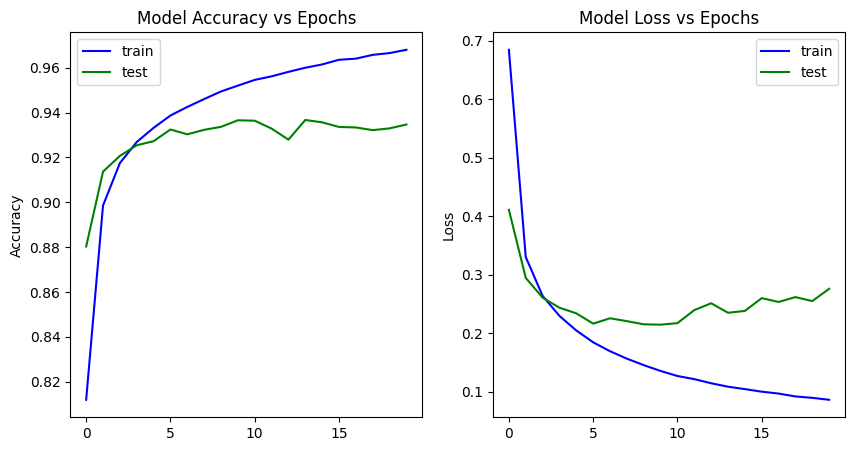

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Model Accuracy vs Epochs')
plt.plot(epochs, history.history['accuracy'], label='train', color='blue')
plt.ylabel('Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='test', color='green')
plt.legend()

plt.subplot(1,2,2)
plt.title('Model Loss vs Epochs')
plt.plot(epochs, history.history['loss'], label='train', color='blue')
plt.ylabel('Loss')
plt.plot(epochs, history.history['val_loss'], label='test', color='green')
plt.legend()
plt.show()

Through the first phase of training, we notice that validation metrics are constantly improving. The accuracy of the model is 96.8% for train dataset and 93.47% for test dataset.

### Conclusion

We explored the 94 Characters TMNIST dataset and build a Convolutional Neural Network model. After training the model, it achieved an accuracy of 93.58% on validation dataset.

### References

1. https://www.tensorflow.org/tutorials/images/cnn
2. https://towardsdatascience.com/understanding-cnn-convolutional-neural-network-69fd626ee7d4
3. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Neural_Network_Type_Classification_TMNIST/tmnist-classifier-dnn-and-cnn.ipynb

### MIT License
Copyright (c) 2023 Dipika Mohanty

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.